# Recommendtion System for Ecommerce Shop

#### Importing packages

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
print("import complete")

import complete


#### Data Importation

In [3]:

data = pd.read_csv('ratings_beauty.csv')
print("Import complete")

Import complete


#### Data exploration

In [4]:
#Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [5]:
#summarize the data
data.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [6]:
#Shape of the data
data.shape

(2023070, 4)

In [7]:
#Displaying the first five columns of the data
data.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [8]:
data.tail()

,UserId,ProductId,Rating,Timestamp
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200
2023069,A1PB6OT0OOPKNQ,B00LU0LTOU,5.0,1405641600


In [9]:
#checking for missing values
data.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

### Visualization

In [10]:
#Importing Seaborn - a visualization library
import seaborn as sns

<AxesSubplot:xlabel='Rating', ylabel='count'>

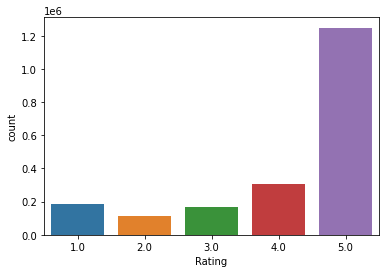

In [11]:
#Count number of every ratng graphically
sns.countplot(x='Rating', data=data)

In [12]:
#How many users have given a particular rating
data.groupby('Rating')['UserId'].count()

Rating
1.0     183784
2.0     113034
3.0     169791
4.0     307740
5.0    1248721
Name: UserId, dtype: int64

### Data Preprocesing

In [13]:
#removing timestamp column because we don't need it.
data.drop('Timestamp', inplace= True, axis= 1)
data

,UserId,ProductId,Rating
0,A39HTATAQ9V7YF,0205616461,5.0
1,A3JM6GV9MNOF9X,0558925278,3.0
2,A1Z513UWSAAO0F,0558925278,5.0
3,A1WMRR494NWEWV,0733001998,4.0
4,A3IAAVS479H7M7,0737104473,1.0
...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0


In [14]:
#create a dataframe with average rating in one column
rating= pd.DataFrame(data.groupby('ProductId')['Rating'].mean().sort_values(ascending=False))

#create another column with number of rating given to that product
rating['number of rating'] = pd.DataFrame(data.groupby('ProductId')['Rating'].count().sort_values(ascending=False))
rating.sort_values('number of rating',ascending=False)

,Rating,number of rating
ProductId,,
B001MA0QY2,4.321386,7533
B0009V1YR8,3.568839,2869
B0043OYFKU,4.310456,2477
B0000YUXI0,4.405040,2143
B003V265QW,4.365421,2088
...,...,...
B0013H228W,5.000000,1
B0013GNAIE,5.000000,1
B0013GNAG6,5.000000,1


In [15]:
#Checking number of unique users
data['UserId'].nunique()
# data.ProductId.nunique()

1210271

In [16]:
#Reducing sample size
print(data.shape)
data = data.sample(n=10000)
data.shape


(2023070, 3)


(10000, 3)

<AxesSubplot:xlabel='Rating', ylabel='count'>

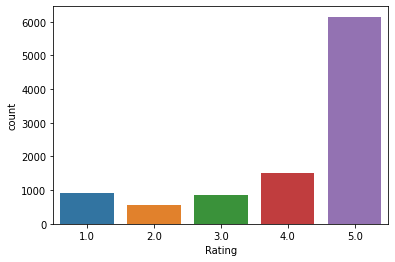

In [17]:
sns.countplot(x='Rating', data=data)

In [18]:
#create a dataframe with average rating in one column
rating= pd.DataFrame(data.groupby('ProductId')['Rating'].mean().sort_values(ascending=False))

#create another column with number of rating given to that product
rating['number of rating'] = pd.DataFrame(data.groupby('ProductId')['Rating'].count().sort_values(ascending=False))
rating.sort_values('number of rating',ascending=False)

,Rating,number of rating
ProductId,,
B001MA0QY2,4.355556,45
B003V265QW,4.375000,16
B0009V1YR8,4.142857,14
B000TKH6G2,4.083333,12
B006L1DNWY,4.583333,12
...,...,...
B007EVBMQY,5.000000,1
B007F9FHXO,5.000000,1
B007FI5QT0,5.000000,1


<AxesSubplot:xlabel='ProductId'>

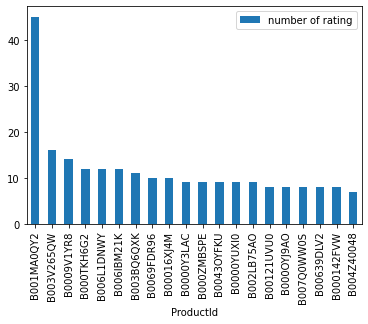

In [19]:
#Top 20 products sell by ecommerce website shown graphically

rating[['number of rating']].sort_values('number of rating',ascending=False).head(20).plot(kind='bar')

In [22]:
#Top 5 most popular products to be recommended to a new user
popular_products = rating[['number of rating']].sort_values('number of rating',ascending=False).head()
popular_products

,number of rating
ProductId,
B001MA0QY2,45
B003V265QW,16
B0009V1YR8,14
B000TKH6G2,12
B006L1DNWY,12


### Machine Learning

In [23]:
#create a user item matrix. 
ratings_utility_matrix = data.pivot_table(values='Rating', index='UserId', columns='ProductId')
ratings_utility_matrix.head(10)

ProductId,1304665720,9790773609,9790781946,9790782667,9790787049,9790790961,B0000065GY,B00000744O,B00004TMFE,B00004TUBL,...,B00KQWBJ5W,B00KT47H3A,B00KTLBDYM,B00KWE08Q0,B00KWFDBKE,B00KYXSF00,B00L3LBUGI,B00L5HUNPO,B00L5JHZJO,B00L8JBNE4
UserId,,,,,,,,,,,,,,,,,,,,,
A005011233SVRED9Q0VY0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A01725181VAXRZH7B0NO4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0345029SW3JMKJLMHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0577300QKTFNUFIAJTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A059899119L7CHCKBYQRD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0738179185L47R3XMVOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A07410232KYRFR25CIUGJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A084344216TA5QUZURDPK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A089463120G0FQBJ8O7W1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
ratings_utility_matrix.shape

(9893, 8170)

In [26]:
ratings_utility_matrix.fillna(0, inplace=True)

In [27]:
# Transpose the matrix
X = ratings_utility_matrix.T

In [28]:
X.head()

UserId,A005011233SVRED9Q0VY0,A01725181VAXRZH7B0NO4,A0345029SW3JMKJLMHER,A0577300QKTFNUFIAJTA,A059899119L7CHCKBYQRD,A0738179185L47R3XMVOG,A07410232KYRFR25CIUGJ,A084344216TA5QUZURDPK,A089463120G0FQBJ8O7W1,A09380963AVK0W4UOYMZS,...,AZU3M6SEKB2ZH,AZU6GAU5EITMZ,AZV7X59SZH7DN,AZXIOFN3TDXQ1,AZXNMJ57QAZ9N,AZYK8XSKEFQJ0,AZYLIP3MCH0Q1,AZZEK6JAYP3HX,AZZOQRSJP143F,AZZQXL8VDCFTV
ProductId,,,,,,,,,,,,,,,,,,,,,
1304665720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9790773609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9790781946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9790782667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9790787049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
X.shape

(8170, 9893)

#### Decomposing the matrix using TruncatedSVD, It is a dimensionality reduction technique.

In [30]:
from sklearn.decomposition import TruncatedSVD

In [31]:
#n_component is desired dimension of output data
SVD = TruncatedSVD(n_components=10) 
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix

array([[ 8.60540910e-18, -5.17390523e-15,  9.40467864e-15, ...,
         4.26264472e-14, -7.89510494e-14,  1.33740729e-13],
       [-1.62058146e-10, -5.85376600e-08, -1.20349135e-07, ...,
        -1.00571167e-06, -1.65742104e-06, -6.43483486e-07],
       [-5.74064130e-10,  7.35827168e-07, -2.23143202e-06, ...,
        -3.09879903e-06, -8.63992266e-06, -1.02293076e-05],
       ...,
       [-4.88000563e-09,  1.42814464e-06,  2.91551197e-06, ...,
         2.19414450e-05,  3.59670865e-05, -1.05194376e-05],
       [ 8.54828885e-06, -9.53132639e-04,  1.92809657e-03, ...,
        -4.63617545e-03, -2.71816903e-02,  4.00349361e-02],
       [ 2.25006654e-09,  2.20368136e-09,  1.13941576e-07, ...,
        -7.90348996e-06,  1.15871258e-05, -3.13767503e-07]])

In [32]:
decomposed_matrix.shape

(8170, 10)

In [39]:
#corrcoef() returns the correlation matrix with correlation coefficient in it. 

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix

array([[ 1.        ,  0.03206577, -0.40568609, ..., -0.54958998,
         0.93369155, -0.47034676],
       [ 0.03206577,  1.        ,  0.77790199, ..., -0.77067611,
         0.12250818, -0.45065444],
       [-0.40568609,  0.77790199,  1.        , ..., -0.29603037,
        -0.43195954, -0.46077887],
       ...,
       [-0.54958998, -0.77067611, -0.29603037, ...,  1.        ,
        -0.67636616,  0.36907317],
       [ 0.93369155,  0.12250818, -0.43195954, ..., -0.67636616,
         1.        , -0.23368767],
       [-0.47034676, -0.45065444, -0.46077887, ...,  0.36907317,
        -0.23368767,  1.        ]])

In [34]:
correlation_matrix.shape

(8170, 8170)

In [42]:
#choose a random index
import random
i = random.randint(0,correlation_matrix.shape[0])
i

6951

In [43]:
#The Product ID of the product the customer purchased
product_ID = X.index[i]
product_ID

'B009IROKBQ'

'B005GHP5UC

In [37]:
#All the correlation of those products which are correlated to the product that customer purchase
correlation_ProductId = correlation_matrix[i]

correlation_ProductId

array([-0.42841073, -0.00597   ,  0.3286946 , ...,  0.31918284,
       -0.43100097, -0.10299295])

In [38]:
#Top products to be displayed by the recommendation system to the above customer based on the purchase history of other cutomers on website
recommended_products = X.index[correlation_ProductId > 0.90] 
recommended_products = list(recommended_products)

#Top 10 Products recommended to the user based on the purchase done by user
recommended_products[0:10]

['B0000536EK',
 'B0007CXXJQ',
 'B0009OAI6I',
 'B0009XH6SC',
 'B000C1W5GY',
 'B000C1Z7BY',
 'B000EBOU0Q',
 'B000MGSJBY',
 'B000NVSVMK',
 'B000OYNCES']